# Ableitungen der Sinus- und der Kosinusfunktion

Es ist keine einfache und kurze Weise bekannt, um rigorose herzuleiten, was die Ableitungen der Sinus- und der Kosinusfunktionen sind. Um die Formel, die Sie in der Formelsammlung finden zu rechtfertigen, habe ich ein kurzes Programm geschrieben. Die Grundidee ist es, sich der Ableitung numerisch (*brute force* mit einem Rechner und nicht analytisch mit Gleichungen) anzunähern und zu sehen, ob uns das Resultat bekannt vorkommt. Im Ingenieurwesen wir diese Technik **sehr** häufig verwendet.

Zuerst "importieren" wir einige nützliche Programmierwerkzeuge, damit wir nicht alles von Grund auf programmieren müssen.

In [1]:
import numpy as np # effizientes Arbeiten mit speziellen mathematischen Listen
import pandas as pd # Darstellung von  allgemeineren Listen (wie "Microsoft Excel", aber besser geeignet für Technisches)
import matplotlib.pyplot as plt # Graphen erzeugen
from matplotlib.ticker import FuncFormatter, MultipleLocator # Achsen-Beschriftung mit Vielfachen von Pi

Die Ableitung einer Funktion $f(x)$ kann mathematisch definiert werden als:

$$f'(x)=\lim_{\Delta x \rightarrow 0}\frac{f(x+\Delta x) -f(x)}{\Delta x}$$

In unserem Fall interessieren wir uns für die Funktion $f(x)=sin(x)$.

Die Idee des nummerischen Ableitens ist es, ein genug kleines - aber nicht gegen Null tendierendes - $\Delta x$ zu wählen.

In [2]:
delta_x = 1e-5
x_min = -1.5
x_max = 7.5

Danach generiert man eine Liste von x-Werten in regelmässigen Abständen von $\Delta x$. Für diese x-Werte werden auch die zugehörigen Funktionswerte ausgerechnet. Die Ableitung an der Stelle $x_i$ wird dann angenähert durch eine [modifizierte Sekantensteigung](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html):

$$f'(x_i) \approx \frac{f(x_{i+1})-f(x_{i-1})}{2 \Delta x}$$

An den Rändern nehmen wir $f'(x_0) \approx \frac{f(x_{1})-f(x_{0})}{\Delta x}$ und $f'(x_{N-1}) \approx \frac{f(x_{N-1})-f(x_{N-2})}{\Delta x}$

In [3]:
# Generieren der Liste von x-Werten
xs = np.arange(x_min,x_max,delta_x)
# Funktionswerte ausrechnen für sämtliche x-Werte
ys = np.sin(xs)
# Numerische Ableitung - kommt häufig vor, deshalb gibt es eine Funktion dafür
ys_dot = np.gradient(ys,xs) 
# Umwandeln in Pandas-Format für eine schönere Anzeige
df = pd. DataFrame(np.array([xs,ys,ys_dot]).T,columns=["$x_i$","$sin(x_i)$","≈ $sin'(x_i)$"]) 
df.index.name = "Index $i$" # Index Kolonnenname setzen
df

,$x_i$,$sin(x_i)$,≈ $sin'(x_i)$
Index $i$,,,
0,-1.50000,-0.997495,0.070742
1,-1.49999,-0.997494,0.070747
2,-1.49998,-0.997494,0.070757
3,-1.49997,-0.997493,0.070767
4,-1.49996,-0.997492,0.070777
...,...,...,...
899995,7.49995,0.937983,0.346682
899996,7.49996,0.937986,0.346673
899997,7.49997,0.937990,0.346663


Das Resultat lässt sich am einfachsten in Graph-Form darstellen. 

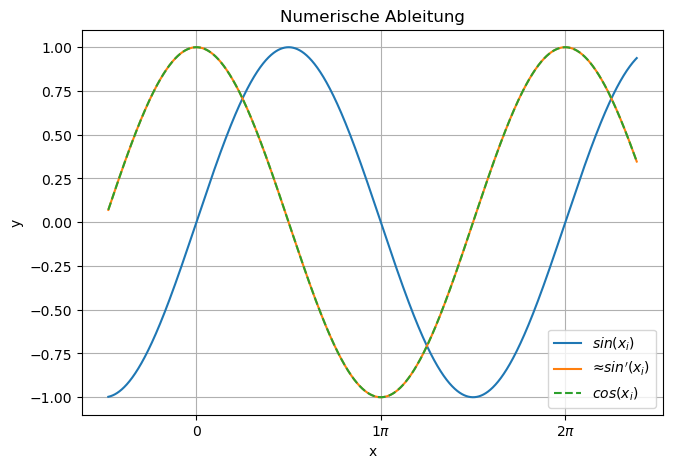

In [4]:
fig,ax = plt.subplots(figsize=(7.5,5)) # Generieren des zu füllenden Graphen

plt.plot(xs,ys,label="$sin(x_i)$") # sin(x_i) zeichnen mit linearer Interpolation
plt.plot(xs,ys_dot,label="$≈sin'(x_i)$") # Die numerische Ableitung von sin'(x_i) zeichnen mit linearer Interpolation
plt.plot(xs,np.cos(xs),label="$cos(x_i)$",ls="dashed") # cos(x_i) zeichnen mit linearer Interpolation als Vergleich

# x-Achse in Vielfachen von Pi angeben
ax.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

plt.xlabel("x") # x-Achse beschriften
plt.ylabel("y") # y-Achse beschriften
plt.title("Numerische Ableitung")

plt.legend(loc='lower right') # Legende anzeigen
plt.grid(True) # Hintergrundraster zur Orientierung anzeigen
plt.show()

Die numerisch errechnete Ableitung der Sinusfunktion ist von Auge nicht zu unterscheiden von der Cosinusfunktion. Im Formelbuch finden Sie tatsächlich, dass:

$$sin'(x)=cos(x)$$

Ist die Ableitung der Sinusfunktion bekannt, kennt man automatisch auch jene der Kosinusfunktion, denn $cos(x)=sin(90°+x)$. Daraus folgt:

$$cos'(x)=cos(90°+x)=-sin(x)$$